## Smartphone Market Data 
This data set represents the market data for smartphones in India. India was specifically chosen for this survey since it contains a large population with a rapidly growing smartphone industry. The data was gathered in 2020 and compiled into this set where it contains 1513 entries of various smartphones and their attributes. The attributes given are as follows:

* Product name: While we’ll be calling it “product name”, some people may commonly refer to it as the title of the product. An example would be the Micromax Canvas Elanza A93 (Black Silver, 4 GB)

* Product url: Product URL is the URL to the page which contains the product information. 

* Brand: Brand is the name of the brand, for example Samsung. Under the brand Samsung, they sell 243 models. Some of them are variants of the same model but for the sake of analysis we consider them as two distinct models and they have different UPC’s.

* Sale price: Sale price is the price at which the product is available on Flipkart for sale. It is the price after the discounts.

* MRP: MRP is the maximum retail price of the product.

* Discount percentage: Discount percentage is the discount offered by the brand for that particular product.

* Ram: The Ram Capacity of the smartphone

* Number of ratings: The total number of star ratings given to that particular product.

* Number of reviews: The total number of reviews given to the product by the user.

* UPC:  UPC or universal product code is the unique identification for a model.

* Star rating: Star rating is the average star rating of the product.

The full data set information as well as the survey can be found here at: https://www.blog.datahut.co/post/indian-smartphone-market-analysis-insights

In [1848]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from random import randrange

df = pd.read_csv('https://raw.githubusercontent.com/AvenashRamnarine/CSCI381/main/smartphone_category%20(1).csv')
df

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"XOLO T1000 (Black, 4 GB)",https://www.flipkart.com/xolo-t1000-black-4-gb...,XOLO,14153,14153,0,333,130,MOBDMKDAKQGCYZ6D,3.8,1 GB
1,"GIONEE Pioneer P3 (White, 4 GB)",https://www.flipkart.com/gionee-pioneer-p3-whi...,GIONEE,6500,6500,0,437,78,MOBDRKHTA3UXHAVD,3.6,512 MB
2,"KARBONN Titanium S4 (Black, 4 GB)",https://www.flipkart.com/karbonn-titanium-s4-b...,KARBONN,13298,13298,0,28,7,MOBDRYWHA3ZU9BRT,3.3,1 GB
3,"KARBONN Titanium S4 (White, 4 GB)",https://www.flipkart.com/karbonn-titanium-s4-w...,KARBONN,14990,14990,0,28,7,MOBDRYWHFVVQHQVZ,3.3,1 GB
4,"Micromax Bolt A71 (Black, 165 MB)",https://www.flipkart.com/micromax-bolt-a71-bla...,Micromax,6499,7499,13,61,8,MOBDSMAJ5UUJUDDE,3.1,512 MB
...,...,...,...,...,...,...,...,...,...,...,...
1508,"Kekai Prime (Sea Blue, 32 GB)",https://www.flipkart.com/kekai-prime-sea-blue-...,Kekai,5499,5499,0,0,0,MOBGYYUWTY8DJUES,0.0,2 GB
1509,"GIONEE S11 (Gold, 64 GB)",https://www.flipkart.com/gionee-s11-gold-64-gb...,GIONEE,8990,8990,0,0,0,MOBGYYUX6EBEHJCF,0.0,4 GB
1510,"Kekai Prime (Sea White, 32 GB)",https://www.flipkart.com/kekai-prime-sea-white...,Kekai,5499,5499,0,0,0,MOBGYYUXQZBZ4DAY,0.0,2 GB
1511,"Telefono S1 (Interstellar Black, 32 GB)",https://www.flipkart.com/telefono-s1-interstel...,Telefono,5990,5990,0,0,0,MOBGYZ8ZYCKJFEWV,0.0,3 GB


Taking a look at this data set the first thing that stands out is the amount of information contained within it. While this is usually a good thing, looking at this data set you can see that some of information given is very redundant and not of value to our analysis. For example, the product URL column can be helpful in some situations, however for our purposes we should probably go ahead and drop it, since it may cause alterations in our data.

In [1849]:
df.drop(['Product URL'], axis = 1, inplace = True)
df.head()

,Product Name,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"XOLO T1000 (Black, 4 GB)",XOLO,14153,14153,0,333,130,MOBDMKDAKQGCYZ6D,3.8,1 GB
1,"GIONEE Pioneer P3 (White, 4 GB)",GIONEE,6500,6500,0,437,78,MOBDRKHTA3UXHAVD,3.6,512 MB
2,"KARBONN Titanium S4 (Black, 4 GB)",KARBONN,13298,13298,0,28,7,MOBDRYWHA3ZU9BRT,3.3,1 GB
3,"KARBONN Titanium S4 (White, 4 GB)",KARBONN,14990,14990,0,28,7,MOBDRYWHFVVQHQVZ,3.3,1 GB
4,"Micromax Bolt A71 (Black, 165 MB)",Micromax,6499,7499,13,61,8,MOBDSMAJ5UUJUDDE,3.1,512 MB


The next things we can also look to drop can be the Mrp (Max Retail Price) and Discount Percentage columns. You can see that the sale price and Mrp are generally the same so there's no reason to have 2 columns with the same data. Likewise the discount percentage isn't helpful to us since we are trying to analyze the data and not looking to purchase a smartphone. Also most of the values in discount percantage are '0' anyway so it won't change much whether it's there or not. So we drop those 2 columns.

In [1850]:
df.drop(['Mrp'], axis = 1, inplace = True)
df.drop(['Discount Percentage'], axis = 1, inplace = True)
df

,Product Name,Brand,Sale Price,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"XOLO T1000 (Black, 4 GB)",XOLO,14153,333,130,MOBDMKDAKQGCYZ6D,3.8,1 GB
1,"GIONEE Pioneer P3 (White, 4 GB)",GIONEE,6500,437,78,MOBDRKHTA3UXHAVD,3.6,512 MB
2,"KARBONN Titanium S4 (Black, 4 GB)",KARBONN,13298,28,7,MOBDRYWHA3ZU9BRT,3.3,1 GB
3,"KARBONN Titanium S4 (White, 4 GB)",KARBONN,14990,28,7,MOBDRYWHFVVQHQVZ,3.3,1 GB
4,"Micromax Bolt A71 (Black, 165 MB)",Micromax,6499,61,8,MOBDSMAJ5UUJUDDE,3.1,512 MB
...,...,...,...,...,...,...,...,...
1508,"Kekai Prime (Sea Blue, 32 GB)",Kekai,5499,0,0,MOBGYYUWTY8DJUES,0.0,2 GB
1509,"GIONEE S11 (Gold, 64 GB)",GIONEE,8990,0,0,MOBGYYUX6EBEHJCF,0.0,4 GB
1510,"Kekai Prime (Sea White, 32 GB)",Kekai,5499,0,0,MOBGYYUXQZBZ4DAY,0.0,2 GB
1511,"Telefono S1 (Interstellar Black, 32 GB)",Telefono,5990,0,0,MOBGYZ8ZYCKJFEWV,0.0,3 GB


Next up would be to check for any missing or null values within the data set. As we know, null values can have unforseen consequences when trying to compute different aspects of our data set, so they should be dealt with accordingly. 

In [1851]:
df.isnull().sum()

Product Name         0
Brand                0
Sale Price           0
Number Of Ratings    0
Number Of Reviews    0
Upc                  0
Star Rating          0
Ram                  0
dtype: int64

As you can see we don't have any null values within the data set so that is great. This means we can move on to the next part and begin to further analyze our data.

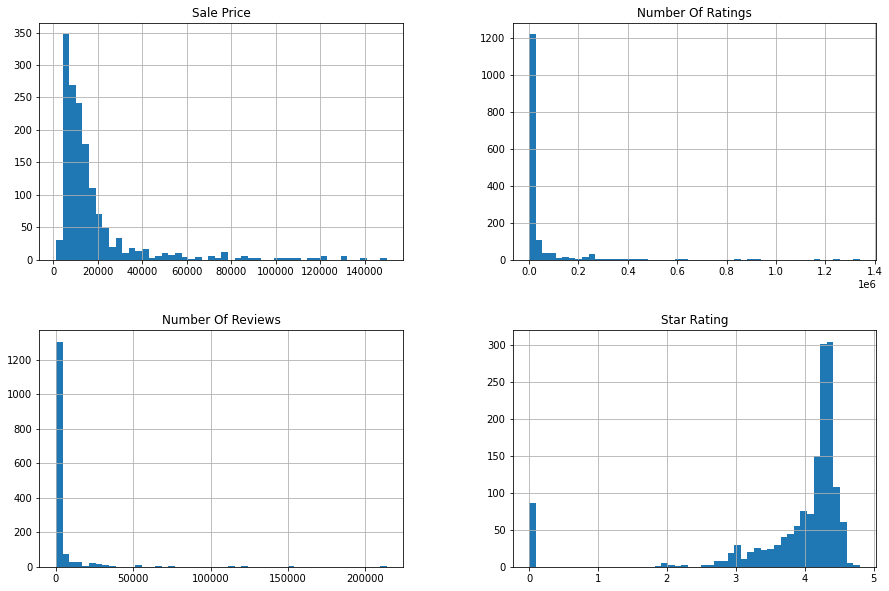

In [1852]:
df.hist(bins=50, figsize=(15,10))
plt.show()

Using histograms we are able to see the graphical representation of the data here. However one thing that is noticeable right away is that the sale price of the smartphones seem to be in a different currency. This makes sense as the survey was conducted in India so naturally they would use their local currency of rupees. Since we're here in the United States however, it seems appropriate to convert the data into our currency for easy of use. So I found the current conversion rate for Indian rupees online which is 0.013 and multiplied that by the values withing the sale price column.

In [1853]:
df['Sale Price'] = df['Sale Price'] * 0.013
df

,Product Name,Brand,Sale Price,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"XOLO T1000 (Black, 4 GB)",XOLO,183.989,333,130,MOBDMKDAKQGCYZ6D,3.8,1 GB
1,"GIONEE Pioneer P3 (White, 4 GB)",GIONEE,84.500,437,78,MOBDRKHTA3UXHAVD,3.6,512 MB
2,"KARBONN Titanium S4 (Black, 4 GB)",KARBONN,172.874,28,7,MOBDRYWHA3ZU9BRT,3.3,1 GB
3,"KARBONN Titanium S4 (White, 4 GB)",KARBONN,194.870,28,7,MOBDRYWHFVVQHQVZ,3.3,1 GB
4,"Micromax Bolt A71 (Black, 165 MB)",Micromax,84.487,61,8,MOBDSMAJ5UUJUDDE,3.1,512 MB
...,...,...,...,...,...,...,...,...
1508,"Kekai Prime (Sea Blue, 32 GB)",Kekai,71.487,0,0,MOBGYYUWTY8DJUES,0.0,2 GB
1509,"GIONEE S11 (Gold, 64 GB)",GIONEE,116.870,0,0,MOBGYYUX6EBEHJCF,0.0,4 GB
1510,"Kekai Prime (Sea White, 32 GB)",Kekai,71.487,0,0,MOBGYYUXQZBZ4DAY,0.0,2 GB
1511,"Telefono S1 (Interstellar Black, 32 GB)",Telefono,77.870,0,0,MOBGYZ8ZYCKJFEWV,0.0,3 GB


I also noticed that there seems to be a large amount of '0' values for the Number of Ratings, Star Rating, and Number of Reviews columns. So I decided to first count how many instances of this there are.

In [1854]:
#Create a temporary data frame
fixed = df
#In the temp data frame replace all 0's with null
fixed = fixed.replace(0, np.nan)
#Count the amount of nulls within the data frame (representing # of zeros)
print(fixed.isnull().sum())

Product Name           0
Brand                  0
Sale Price             0
Number Of Ratings     86
Number Of Reviews    119
Upc                    0
Star Rating           86
Ram                    0
dtype: int64


Since there seems to very little instances of 0 values, I decided it would be easiest to simply drop these values from the data set. As in doing so it wouldn't cause any problems an also preserve the overwhelming majority of the data.

In [1855]:
fixed = fixed.dropna()
df = fixed
df

,Product Name,Brand,Sale Price,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"XOLO T1000 (Black, 4 GB)",XOLO,183.989,333.0,130.0,MOBDMKDAKQGCYZ6D,3.8,1 GB
1,"GIONEE Pioneer P3 (White, 4 GB)",GIONEE,84.500,437.0,78.0,MOBDRKHTA3UXHAVD,3.6,512 MB
2,"KARBONN Titanium S4 (Black, 4 GB)",KARBONN,172.874,28.0,7.0,MOBDRYWHA3ZU9BRT,3.3,1 GB
3,"KARBONN Titanium S4 (White, 4 GB)",KARBONN,194.870,28.0,7.0,MOBDRYWHFVVQHQVZ,3.3,1 GB
4,"Micromax Bolt A71 (Black, 165 MB)",Micromax,84.487,61.0,8.0,MOBDSMAJ5UUJUDDE,3.1,512 MB
...,...,...,...,...,...,...,...,...
1497,"OPPO F19 Pro (Crystal Silver, 128 GB)",OPPO,259.987,993.0,66.0,MOBGYV9VEMHYEQAA,4.3,8 GB
1498,"OPPO F19 Pro (Crystal Silver, 256 GB)",OPPO,305.370,968.0,65.0,MOBGYV9VFD8HTPZ4,4.3,8 GB
1499,"OPPO F19 Pro (Fluid Black, 256 GB)",OPPO,305.370,968.0,65.0,MOBGYV9VPHZ33BJY,4.3,8 GB
1501,"OPPO A12 (Flowing Silver, 64 GB)",OPPO,116.870,13473.0,669.0,MOBGYX8ETQGZZZ27,4.4,4 GB


Now that the issues are fixed we can look at other aspects of the data. For example let's take a look at Rating vs Sale Price:

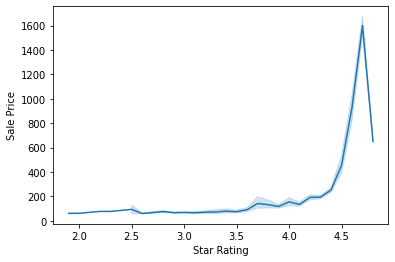

In [1856]:
sns.lineplot(data=df['Star Rating'], x=df['Star Rating'], y=df['Sale Price'])

You notice here a general curve for the higher the rating, the higher the sale price. However I did notice the sharp decline and the very end of the curve. This may be due to an outlier and thus I had to investigate. 

In [1857]:
max_x = df.loc[df['Star Rating'].idxmax()]
print(max_x)

Product Name         ViVO X60 Pro (Midnight Black, 256 GB)
Brand                                                 ViVO
Sale Price                                          649.87
Number Of Ratings                                     45.0
Number Of Reviews                                      6.0
Upc                                       MOBGF89FHMK4Z6NZ
Star Rating                                            4.8
Ram                                                  12 GB
Name: 1372, dtype: object


Looking into it this phone seems to be the 'outlier' with the highest rating but also at a very low price. After researching online however I determined that this is not a mistake, this smart phone does indeed have very high rating while being at a decent price. So while keeping this entry in the data set may skew the data a bit, it is a valid entry and ultimately I decided to keep it.

And now we can just take a look at a few of the individual numerical attributes to make sure the data set is ready to move forward.

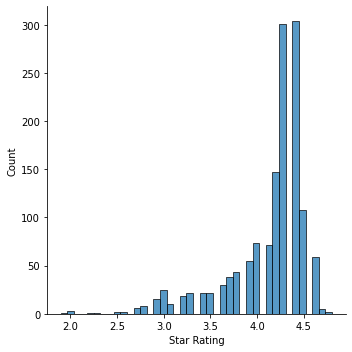

In [1858]:
sns.displot(df['Star Rating'])

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


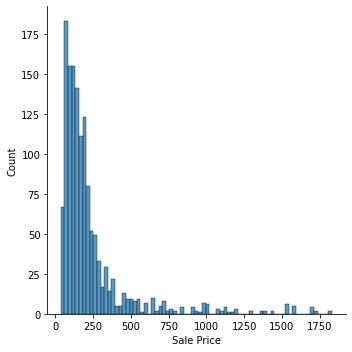

In [1859]:
sns.displot(df['Sale Price'])

## Regression 
The next step was to test some Linear regression models to test the accuracy of our data, while also learning some more information about our data set.

First and foremost for Linear Regression we need a small subset of our data to test on. So I decided to focus on the sale price of Apple smartphones. I chose this subset because generally, Apple cell phones tend to be around a similar price point. And if our model is working correctly, it should be able to accurately predict similar prices.

In [1860]:
from sklearn.linear_model import LinearRegression
apple = df[df['Brand'] == 'Apple']
apple = apple['Sale Price']

n = len(apple)

model = LinearRegression().fit(np.arange(n).reshape((n,1)), apple)

for i in range (10):
  print(model.predict([[i],[i]]))

[1163.34390015 1163.34390015]
[1159.33133071 1159.33133071]
[1155.31876128 1155.31876128]
[1151.30619184 1151.30619184]
[1147.2936224 1147.2936224]
[1143.28105296 1143.28105296]
[1139.26848352 1139.26848352]
[1135.25591408 1135.25591408]
[1131.24334464 1131.24334464]
[1127.2307752 1127.2307752]


In [1861]:
print(apple)

161      648.700
162     1103.700
163     1103.700
164     1001.000
165     1001.000
          ...   
1107     389.987
1108     610.987
1109     610.987
1110     610.987
1111     610.987
Name: Sale Price, Length: 62, dtype: float64


Now comparing this to our actual prices we can see that they are very similar. This means shows that our Linear Regression model is correct and able to accurately predict future values.

In [1873]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder as le 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

apple = df[df['Brand'] == 'Apple']

label = le()
apple = pd.get_dummies(apple)

X = apple[['Star Rating','Number Of Reviews']]
y = apple['Sale Price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .33)
lm = LinearRegression()
lm.fit(X_train, y_train)

lm.score(X_train,y_train)

0.6054673920150799

We can also see here the accuracy percantage which is around 60%. While this is not completely ideal it is a value that can be worked with for this specific model.

The next model that I decided to used was the K-Best using the F-Test and F-Regression. This model is an interesting one as it allows you to select specific categories of the data set and see which of them are most influential. For my purposes I was interested in seeing how the other factors of the data set influence the price of the cell phone. So I decided to make 'Sale Price' my target and get the values.

In [1863]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

temp = df.copy()
temp.drop(['Product Name'], axis = 1, inplace = True)
temp.drop(['Brand'], axis = 1, inplace = True)
temp.drop(['Upc'], axis = 1, inplace = True)
temp.drop(['Ram'], axis = 1, inplace = True)


target = temp['Sale Price']
features = temp.drop('Sale Price', axis = 1).copy()
feature_names = list(features.columns)


selection_kBest = SelectKBest(f_regression, k = 3).fit(features, target)

features_kbest = selection_kBest.get_support()
print('Overall Features ', df.columns, '\n')
print('Chosen features', features.columns[features_kbest], '\n')

selection_kBest.scores_

Overall Features  Index(['Product Name', 'Brand', 'Sale Price', 'Number Of Ratings',
       'Number Of Reviews', 'Upc', 'Star Rating', 'Ram'],
      dtype='object') 

Chosen features Index(['Number Of Ratings', 'Number Of Reviews', 'Star Rating'], dtype='object') 



array([  7.89050343,   6.0943769 , 274.68383002])

And as we can see above, it seems like the rating of the smart phone is the most influential factor when it comes to the price. And this makes sense as usually the higher rated something is, the more demand there is and thus the more expensive it'll be. 

Next I wanted to experiment with the decision tree to see what kind of values this specific model would produce. Here you can see the regression tree utilizing a predictions variable and generating a tree based of those values.

[1714.7        1298.7         454.987       537.32033333 1298.7
 1298.7         986.7        1298.7        1298.7        1615.03333333
  986.7         843.7        1298.7        1615.03333333  537.32033333
  986.7         800.36666667 1714.7        1298.7        1714.7
 1298.7       ]


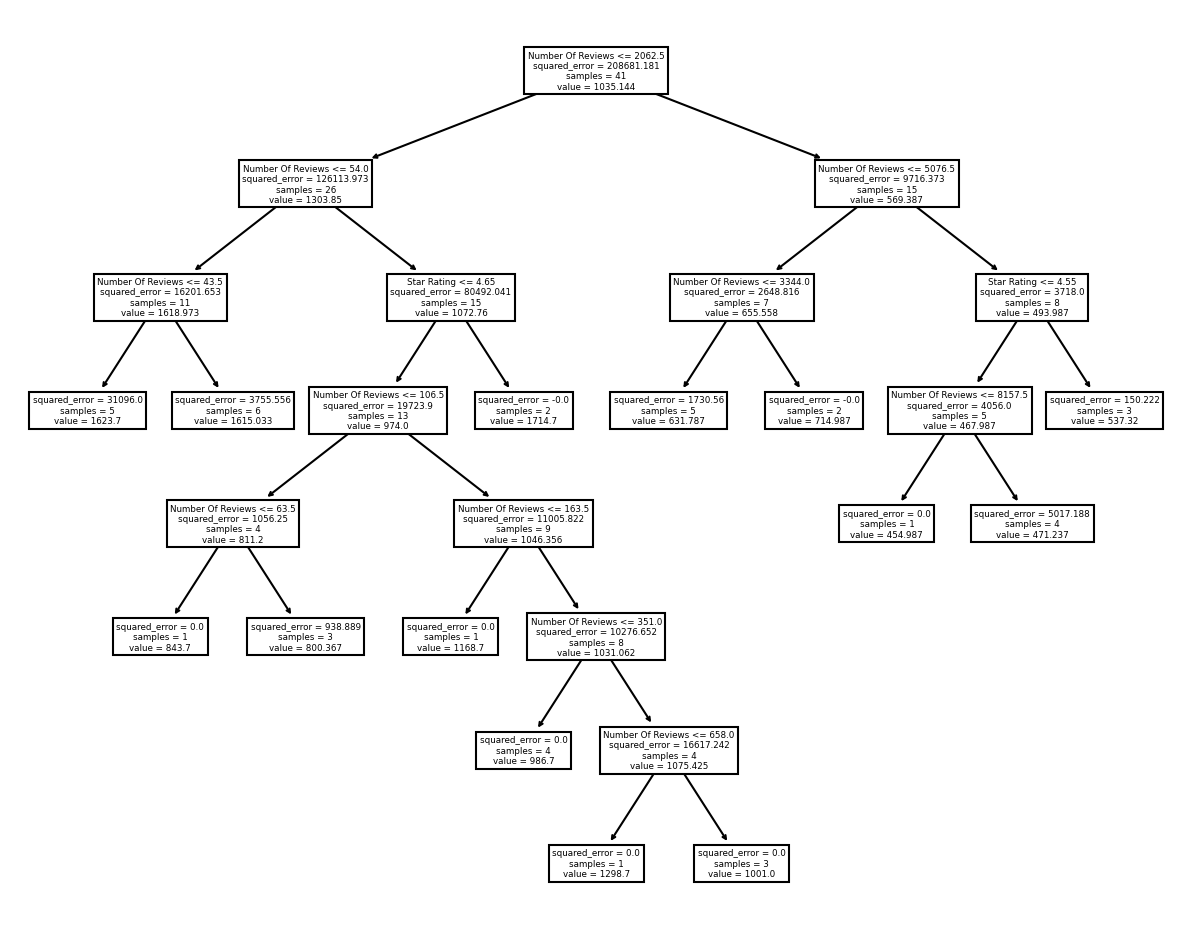

In [1864]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=44)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions)

from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=X.columns);

And for the final model I decided to use a RFE model. The RFE model is yet another way to measure variable importance and helps when trying to determine which variables are most influential for your target. 

In [1865]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


lr = LinearRegression()
rfe = RFE(estimator = lr, n_features_to_select = 6, step = 1)
rfe.fit(features, target)
rfe_features = features.columns[rfe.support_]
print(rfe_features)

Index(['Number Of Ratings', 'Number Of Reviews', 'Star Rating'], dtype='object')


In [1866]:
rfe_output = pd.DataFrame({'Features' : features.columns, 'Rank' : rfe.ranking_}).sort_values(by='Rank')
print(rfe_output)

            Features  Rank
0  Number Of Ratings     1
1  Number Of Reviews     1
2        Star Rating     1


Based on the model you can see that the Number of Ratings, Number of Reviews, and the Star Rating all hold equal rank, which is to be expected based on the results of the previous models.

## Conclusion
So after testing all these models you can see that there are various ways to analyze a data set such as this one. Different models have different information and depending on the situation, it is very true that there is no definite 'best model'. However for our purposes, I believe the K-Best and F-Regression most accurately quantifies the Sale Price variable and it's influences. I do however like the original regression model as well as it gives you a lot of valuable information regarding the data set. In conclusion, perhaps the 'best model' is actually a combination of all them.

## Sources
https://data.world/data-hut/smartphone-category-data
https://www.blog.datahut.co/post/indian-smartphone-market-analysis-insights
https://stackoverflow.com/questions/11350770/filter-pandas-dataframe-by-substring-criteria
https://stackoverflow.com/questions/56809731/how-to-compare-two-data-series-in-one-bar-using-matplotlib
https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe
https://data36.com/regression-tree-python-scikit-learn/
https://www.tutorialspoint.com/python-pandas-find-the-maximum-value-of-a-column-and-return-its-corresponding-row-values#:~:text=To%20find%20the%20maximum%20value,idxmax()%5D.
https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
https://blog.minitab.com/en/adventures-in-statistics-2/what-is-the-f-test-of-overall-significance-in-regression-analysis
https://www.geeksforgeeks.org/ml-logistic-regression-using-python/
https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe
